In [1]:
import os

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

import librosa
import librosa.display

In [3]:
# testing with one mp3 file to convert to a mel spectrogram        

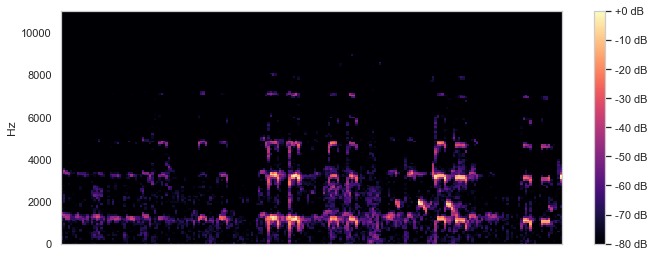

In [4]:
SOUND_DIR='./birds/dataset/blujay/XC16897.mp3'

# Load the mp3 file
signal, sr = librosa.load(SOUND_DIR,duration=10) # sr = sampling rate
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2)

log_S = librosa.power_to_db(S**2,ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_S, fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

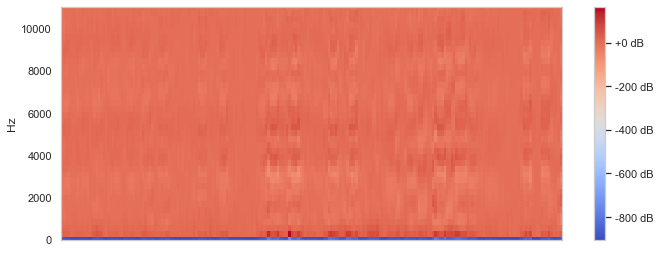

In [5]:
mfccs_librosa = librosa.feature.mfcc(S=log_S,
                                     dct_type=2, n_mfcc=40, norm='ortho', lifter=0)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_librosa, fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [6]:
# model import statements

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [171]:
X=[]
Z=[]
IMG_SIZE=150
amerob_dir= './birds/imgs_unfiltered/amerob'
blujay_dir= './birds/imgs_unfiltered/blujay'
carwre_dir= './birds/imgs_unfiltered/carwre'
dowwoo_dir= './birds/imgs_unfiltered/dowwoo'
eastow_dir= './birds/imgs_unfiltered/eastow'
moudov_dir= './birds/imgs_unfiltered/moudov'
norcar_dir= './birds/imgs_unfiltered/norcar'
rebwoo_dir= './birds/imgs_unfiltered/rebwoo'
tuftit_dir= './birds/imgs_unfiltered/tuftit'
whbnut_dir= './birds/imgs_unfiltered/whbnut'

In [172]:
def assign_label(img,label):
    return label

In [173]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label)
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except Exception as e:
            print(str(e))
        

In [174]:
make_train_data('American Robin',amerob_dir)
print(len(X))

 80%|████████  | 81/101 [00:00<00:00, 396.25it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 392.12it/s]

100


In [175]:
make_train_data('Blue Jay',blujay_dir)
print(len(X))

 76%|███████▌  | 77/101 [00:00<00:00, 381.63it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 374.29it/s]

200


In [176]:
make_train_data('Carolina Wren', carwre_dir)
print(len(X))

 75%|███████▌  | 76/101 [00:00<00:00, 370.02it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 373.21it/s]

300


In [177]:
make_train_data('Downy Woodpecker', dowwoo_dir)
print(len(X))

 74%|███████▍  | 75/101 [00:00<00:00, 365.41it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 357.95it/s]

400


In [178]:
make_train_data('Eastern Towhee', eastow_dir)
print(len(X))

 78%|███████▊  | 79/101 [00:00<00:00, 394.61it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 392.41it/s]

500


In [179]:
make_train_data('Mourning Dove', moudov_dir)
print(len(X))

 69%|██████▉   | 70/101 [00:00<00:00, 343.78it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 344.59it/s]

600


In [180]:
make_train_data('Northern Cardinal', norcar_dir)
print(len(X))

 79%|███████▉  | 80/101 [00:00<00:00, 392.91it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 388.67it/s]

700


In [181]:
make_train_data('Red-bellied Woodpecker', rebwoo_dir)
print(len(X))

 72%|███████▏  | 73/101 [00:00<00:00, 355.78it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 359.36it/s]

800


In [182]:
make_train_data('Tufted Titmouse', tuftit_dir)
print(len(X))

 75%|███████▌  | 76/101 [00:00<00:00, 372.71it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 375.69it/s]

900


In [183]:
make_train_data('White-breasted Nuthatch', whbnut_dir)
print(len(X))

 75%|███████▌  | 76/101 [00:00<00:00, 372.29it/s]

OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 101/101 [00:00<00:00, 376.23it/s]

1000


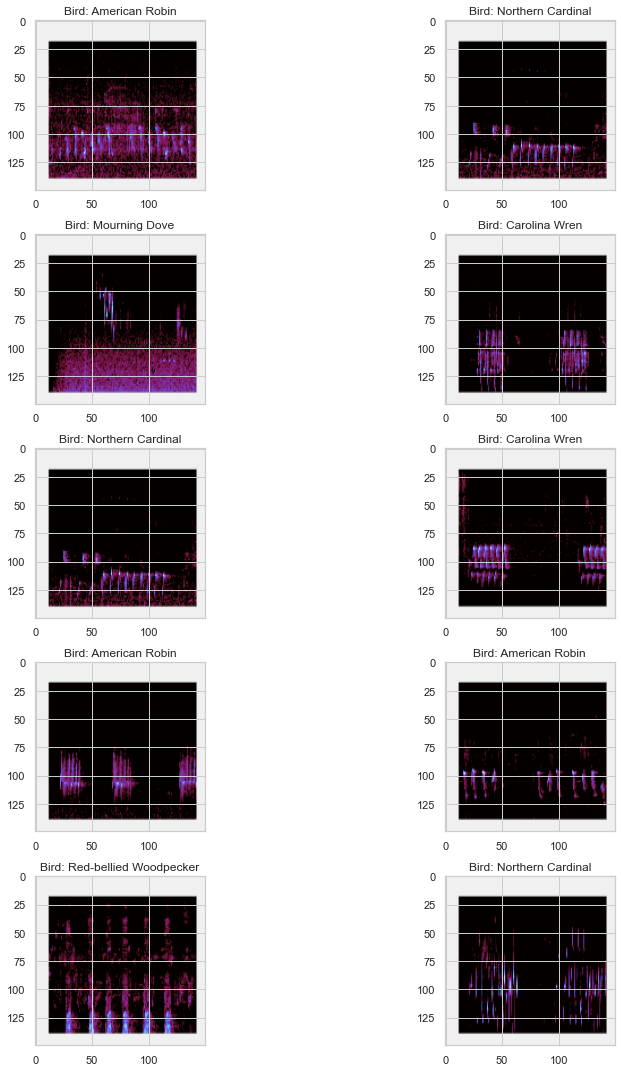

In [184]:
#random 10 images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Bird: '+Z[l])
        
plt.tight_layout()

In [185]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [186]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [187]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [188]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [189]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [190]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [191]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 18, 18, 96)       

In [192]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [193]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
5/5 [==============================] - 8s 2s/step - loss: 2.3089 - accuracy: 0.0891 - val_loss: 2.3248 - val_accuracy: 0.0720
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 2.3007 - accuracy: 0.1431 - val_loss: 2.3040 - val_accuracy: 0.0880
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 2.2891 - accuracy: 0.1437 - val_loss: 2.3006 - val_accuracy: 0.0840
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 2.2576 - accuracy: 0.1431 - val_loss: 2.3830 - val_accuracy: 0.0960
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 2.2248 - accuracy: 0.1752 - val_loss: 2.1732 - val_accuracy: 0.2560
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 2.1594 - accuracy: 0.2375 - val_loss: 2.2619 - val_accuracy: 0.2040
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 2.1628 - accuracy: 0.2010 - val_loss: 2.1505 - val_accuracy: 0.2360
Epoch 8/50
5/5 [=========================